<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/SVM/FJP_DS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
x1=np.arange(0, 50, 1)
x2=np.random.rand(50)*50

In [5]:
x1 , x2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([ 1.8907409 , 27.50011647, 48.846307  , 42.36254626, 40.0260366 ,
         1.20364401, 37.32244471, 20.59330781, 18.91744293,  3.24391035,
        11.26055636, 48.52288769, 30.84649918, 29.60958613,  4.86608106,
        26.56611793, 14.14501974, 35.78431518, 37.70073038, 24.83016119,
        30.02075223, 30.42956752, 47.07339868, 25.27526336,  6.50155488,
         1.51170046, 48.48277108, 19.30669234, 33.44637368, 14.7760738 ,
        30.80933481,  6.85515253,  2.25613302, 42.83511631, 39.4085529 ,
        42.41532556, 38.88659474, 40.27629086, 22.24300706,  4.7921311 ,
        14.35580176, 39.49369241, 38.83663903, 13.65270996, 22.504792  ,
        46.87699624, 31.55716924, 23.81115148, 42.08514539, 41.60178852]))

In [7]:
y = np.where(x1+x2<=45, 0, 1)

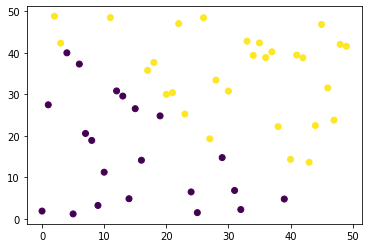

In [8]:
plt.scatter(x1,x2,c = y)

In [9]:
X = np.dstack((x1,x2))[0]

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [12]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


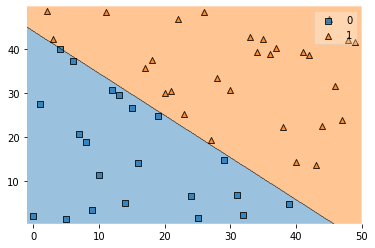

In [13]:
plot_decision_regions(X,y, clf = model)

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

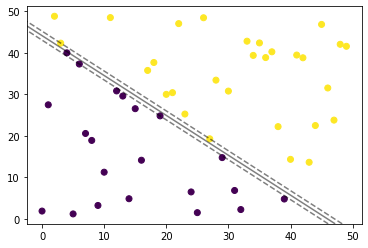

In [15]:
plt.scatter(x1,x2,c = model.predict(X))
plot_svc_decision_function(model)

In [16]:
model2 = SVC(kernel = 'linear', C =1)
model2.fit(X,y)

SVC(C=1, kernel='linear')

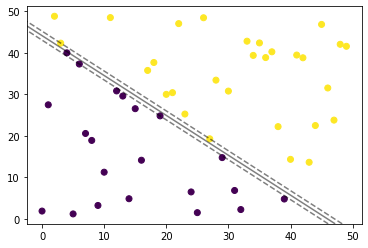

In [17]:
plt.scatter(x1,x2,c = model2.predict(X))
plot_svc_decision_function(model2)

In [18]:
# implementation
class SVM() :
  def __init__( self, iterations=1000, learning_rate = 0.01, C = 10) :
    self.iterations= iterations
    self.C= C
    self.learning_rate = learning_rate
  def fit( self, X, Y) :
    n_samples, n_features = X.shape
    self.w = np.random.rand(n_features)
    self.b = np.random.randint(0,10)

    for _ in range(self.iterations) :
      for x,y in zip(X,Y) :
        correct = y*(np.dot(self.w,x)+ self.b) >=1
        if correct :
          self.w = self.w - self.learning_rate*(self.w) 
        else :
          self.w = self.w - self.learning_rate* (self.w - self.C*(np.dot(x,y)))
          self.b = self.b + self.learning_rate* (self.C*y)
  def predict(self,X) :
    distance = np.dot(X,self.w) +self.b
    return np.sign(distance)

In [31]:
x1 = np.arange(0,50,1)
x2 = np.random.rand(50)*50

y = np.where(x1+x2 >= 45, -1,1)

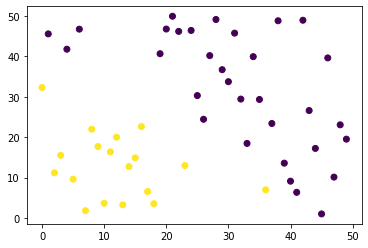

In [32]:
plt.scatter(x1,x2, c = y)

In [33]:
X = np.dstack((x1,x2))[0]

In [34]:
model = SVM()
model.fit(X,y)


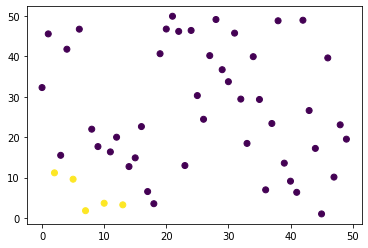

In [35]:
plt.scatter(x1,x2,c = model.predict(X))

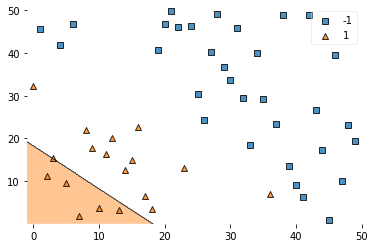

In [36]:

plot_decision_regions(X,y, clf = model)

In [37]:
from sklearn.datasets import make_circles


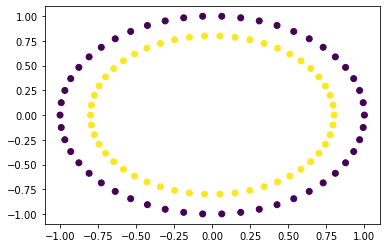

In [38]:
X,y  = make_circles()
plt.scatter(X[:,0],X[:,1],c = y)

In [39]:
from sklearn.svm import SVC

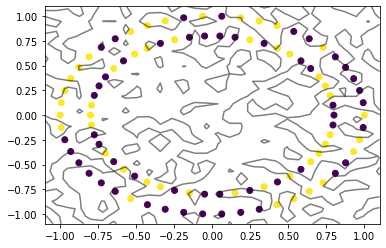

In [40]:
model = SVC(kernel = "linear") 
model.fit(X,y)

plt.scatter(X[:,0],X[:,1], c= model.predict(X))
plot_svc_decision_function(model)

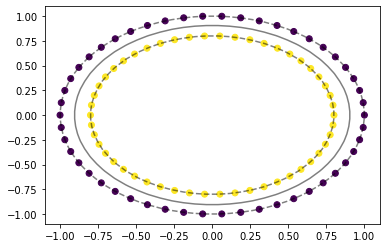

In [41]:
model = SVC(kernel = "poly", degree = 2) 
model.fit(X,y)

plt.scatter(X[:,0],X[:,1], c= model.predict(X))
plot_svc_decision_function(model)

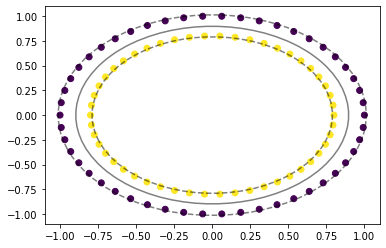

In [42]:
model = SVC(kernel = "rbf") 
model.fit(X,y)

plt.scatter(X[:,0],X[:,1], c= model.predict(X))
plot_svc_decision_function(model)

In [43]:
from sklearn.datasets import make_moons

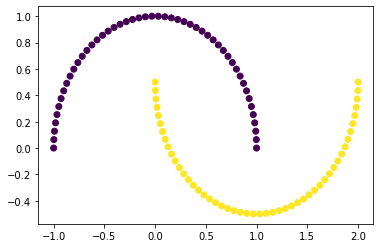

In [44]:
X,y  = make_moons()
plt.scatter(X[:,0],X[:,1], c= y)


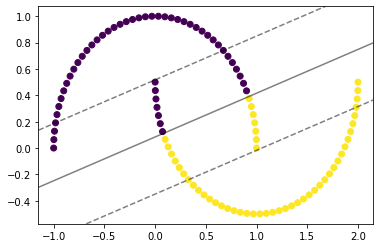

In [45]:
model = SVC(kernel = "linear") 
model.fit(X,y)

plt.scatter(X[:,0],X[:,1], c= model.predict(X))
plot_svc_decision_function(model)

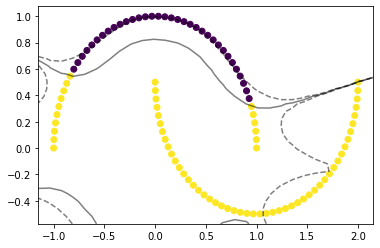

In [46]:
model = SVC(kernel = "poly", degree= 10) 
model.fit(X,y)

plt.scatter(X[:,0],X[:,1], c= model.predict(X))
plot_svc_decision_function(model)

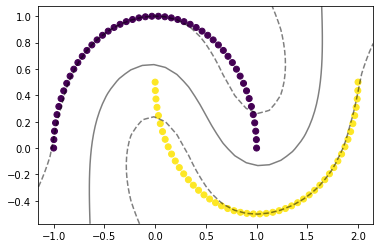

In [47]:
model = SVC(kernel = "rbf") 
model.fit(X,y)

plt.scatter(X[:,0],X[:,1], c= model.predict(X))
plot_svc_decision_function(model)